<a href="https://colab.research.google.com/github/Iamnetis/UMSL-AI/blob/main/my_univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
import pandas as pd
data = pd.read_csv('heart_failure_clinical_records_dataset.csv', delimiter = ',')

In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
import numpy as np
dataset = np.genfromtxt('heart_failure_clinical_records_dataset.csv', delimiter = ',', skip_header= True, usecols = (0, 4))

In [ ]:
print (dataset.shape)

(299, 2)


In [ ]:
print (dataset[0:4])

[[75. 20.]
 [55. 38.]
 [65. 20.]
 [50. 20.]]


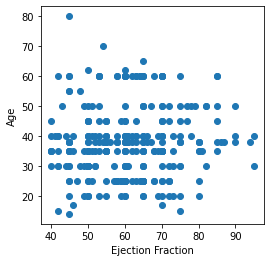

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(dataset[:,0], dataset[:, 1])
plt.xlabel('Ejection Fraction')
plt.ylabel('Age')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
                                                    
model = Sequential()
model.add(Dense(1, input_dim = 1, activation = 'linear'))

In [ ]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
model.fit(dataset[:, 0], dataset[:, 1], epochs= 1000, verbose= 1)

Epoch 1/1000
10/10 [==============================] - 0s 1ms/step - loss: 162.5167 - mse: 162.5167
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 162.4194 - mse: 162.4194
Epoch 3/1000
10/10 [==============================] - 0s 1ms/step - loss: 162.2959 - mse: 162.2959
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 162.4186 - mse: 162.4186
Epoch 5/1000
10/10 [==============================] - 0s 1ms/step - loss: 162.4178 - mse: 162.4178
Epoch 6/1000
10/10 [==============================] - 0s 1ms/step - loss: 162.4031 - mse: 162.4031
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 162.3741 - mse: 162.3741
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 162.4124 - mse: 162.4124
Epoch 9/1000
10/10 [==============================] - 0s 1ms/step - loss: 162.2983 - mse: 162.2983
Epoch 10/1000
10/10 [==============================] - 0s 1ms/step - loss: 162.3685 - mse: 162.3685
Epoch 11/

In [ ]:
print('Model weights - w0(slope m), bias):')
w0 = model.layers[0].get_weights()[0][0]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(b0)


Model weights - w0(slope m), bias):
[0.40434498]
[12.631174]


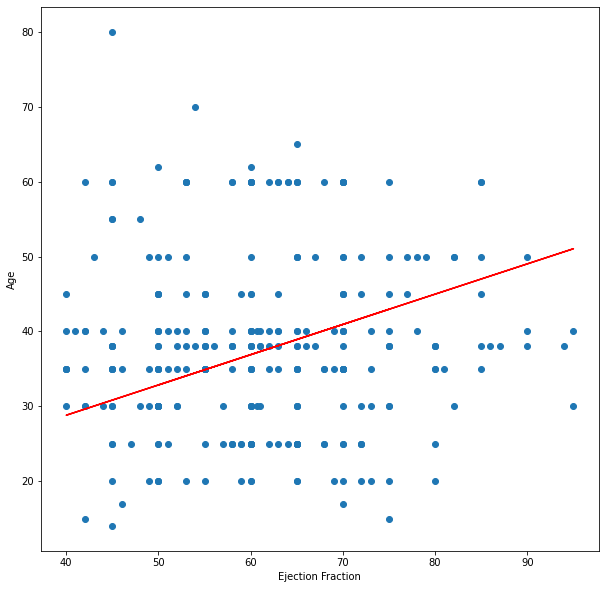

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.plot(dataset[:, 0], b0 + w0 * dataset[:, 0], '-', color = 'red')
plt.xlabel('Ejection Fraction')
plt.ylabel('Age')
plt.show()
